CUID: kn2465


### <b> The generative model </b>

The generative model we use for this senator dataset is:

Draw proportion $\theta \sim Dir_{K}(\alpha = 1)$

For each component $k\in[1..K]$:

1. draw $\beta_{k} \sim Beta(\beta; a=1,b=1)$

For each datapoint $i\in[1..n]$,
1. draw assignment $z_i|\theta \sim Cat(\theta)$

2. draw datapoint $x_i|\beta,z_i \sim Binomial(x; v,\beta_{z_i})$ where $v$ is the number of bills to vote

### <b>Code </b>

First import a few libraries. Here gibbs is a module I wrote for the exercise

In [1]:
from gibbs import gibbs #A module I wrote for the exercise
import numpy as np
import numpy.random as random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 

Read the input files

In [2]:
vote_file = '/home/keane/temp/senate/votes.csv'
senator_file= '/home/keane/temp/senate/senators.txt'

senators = {'party':[], 'state':[]}
with open(senator_file) as file:
    for line in file:
        party, state = line.split(' ')[-1][1:-2].split('-')
        senators['party'].append(party)
        senators['state'].append(state)
        
        
with open(vote_file) as file:
    votes = [line.split(',') for line in file]
    votes = np.array([round(vote.count('1')/(vote.count('1') + vote.count('0')) * 1000) for vote in votes])

When running gibbs sampling with number of clusters = 2, the algorithm quickly converges within 10 iterations:

In [3]:
c = 2
sample = gibbs(x = votes, 
               model = 'bernoulli_beta', 
               c = c, 
               alpha = np.array([1/c]*c), 
               beta = np.array([{'p':random.beta(1,1)} for _ in range(c)]), 
               z = np.array([random.randint(0,c) for _ in range(len(votes))]), 
               beta_alpha = 1,
               beta_beta = 1,
               binomial_n = 1000)

Iter 0: Log likelihood = -24986.58606720283
Iter 1: Log likelihood = -1280.5201681637557
Iter 2: Log likelihood = -993.6460261037996
Iter 3: Log likelihood = -997.6968464881784
Iter 4: Log likelihood = -992.3517003089278
Iter 5: Log likelihood = -992.5721181935724
Compete after 5 iterations: Log likelihood = -992.5721181935724


Group the result to see that the clusters reflect partisanship:

In [4]:
senators['z'] = sample['z'][-1]
pd.DataFrame(senators).groupby(['z', 'party']).count()

state
z party       
0 D          1
  R         44
1 D         54
  I          2
  R          2

Let the sampling run for 100 iterations

In [5]:
c = 2
sample = gibbs(x = votes, 
               model = 'bernoulli_beta', 
               c = c, 
               alpha = np.array([1/c]*c), 
               beta = [{'p':random.beta(1,1)} for _ in range(c)], 
               z = np.array([random.randint(0,c) for _ in range(len(votes))]), 
               beta_alpha = 1,
               beta_beta = 1,
               binomial_n = 1000,
               threshold = 0,
               max_iter = 100,
               logging = False)

Compete after 100 iterations: Log likelihood = -995.2828810830603


Plot of log-joint shows convergence

Text(0.5, 1.0, 'log joint vs iteration')

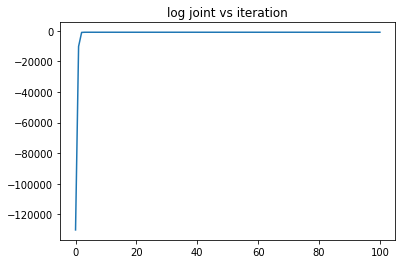

In [6]:
plt.plot(sample['l'])
plt.title('log joint vs iteration')

Plots of component p also show convergence

Text(0.5, 1.0, 'First component p vs iteration')

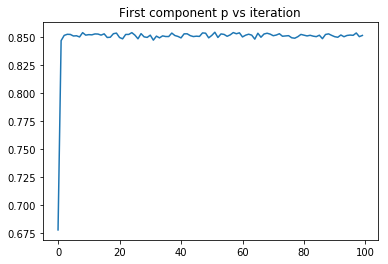

In [7]:
plt.plot([output[0]['p'] for output in sample['beta']])
plt.title('First component p vs iteration')

Text(0.5, 1.0, 'Second component p vs iteration')

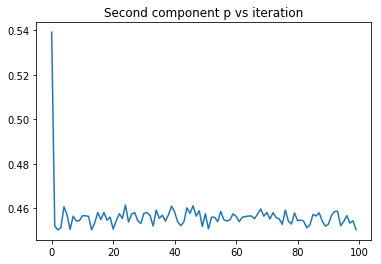

In [8]:
plt.plot([output[1]['p'] for output in sample['beta']])
plt.title('Second component p vs iteration')

### <b>Discussion</b>

   
1. The model captures the partisanship well. Not much information was given about the senators other than party and state, so there is little value to run a higher number of clusters.


2. A mixed-membership model in which we add a latent variable for attributes of the bills would add more depth to the analysis. The mixture model only reflects the partisanship of the senate, the mixed-membership model would let us know the cluster of bills that the senate tends to be more (or less) partisan on.